In [ ]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import csv


data = pd.read_csv(r'C:\Users\Suman\Desktop\AICTE Internship\TCS.csv')

data.drop(data[data['Series'] == 'BL'].index, inplace = True) 

ind  = data.index[-1]-90

for i in range(ind,data.index[-1],1):
    max_p = data['Close Price'].max()
    min_p = data['Close Price'].min()
    mean_p = data['Close Price'].mean()
print('Max price for the last 90 Days: ',max_p)
print('Min price for the last 90 Days:', min_p)
print('Mean price for the last 90 Days: ', mean_p)
print("\n")


"""
max_price = data["Close Price"].tail(90).max()  ,this will find the max price in the last 90 days
Note: Remove the above for loop and use this"""


data['Date'] = pd.to_datetime(data['Date'])

data['Month'] = data['Date'].dt.strftime('%B') 
#data["Month"] = pd.DatetimeIndex(data["Date"].month)

data['Year'] = pd.DatetimeIndex(data['Date']).year


#Pandas default index is int64 and to use groupby or resample we need to change the index
data.set_index(data['Date'], inplace = True)


group = data.groupby(['Month'])


VWAP_array = []

for i in group:
    VWAP = np.sum(data['Close Price']* data['Total Traded Quantity'])/ np.sum(data['Total Traded Quantity'])
    VWAP_array.append(VWAP)
    


def avg_price():
    N = int(input("Enter a number: "))
    mean = np.mean(data['Close Price'].tail(N))  
    print("The Average Price for last " + str(N) + " days: " + str(mean))
    print("\n")
    
avg_price() # N =7, 14, 30, 90, 180, 365


def percentage():
    N = int(input("Enter a number: "))
    difference = data.iloc[-1]['Close Price'] - data.iloc[-N]['Close Price']
    if difference < 0:
        loss = -(difference/data.iloc[-1]['Close Price'])*100
        print("The loss for last " + str(N) + " days: " + str(loss))
        print("\n")
    else:
        profit = (difference/data.iloc[-1]['Close Price'])*100
        print("The profit for last " + str(N) + " days: " + str(profit))
        print("\n")
        
percentage()  # N =7, 14, 30, 90, 180, 365


data['Day_Perc_Change'] = data['Close Price'].pct_change()
data = data.dropna()


def conditions(s):
    if (s['Day_Perc_Change'] > -0.5) and (s['Day_Perc_Change'] < 0.5) :
        return ('Slight or No Change')
    elif (s['Day_Perc_Change']> 0.5) and (s['Day_Perc_Change'] < 1) :
        return ('Slight Positive')
    elif (s['Day_Perc_Change'] < -0.5) and (s['Day_Perc_Change'] > -1):
        return ('Slight Negative')
    elif (s['Day_Perc_Change']) in range(1,3):
        return ('Postive')
    elif (s['Day_Perc_Change']) in range(-1,-3):
        return ('Negative')
    elif (s['Day_Perc_Change']) in range(3,7):
        return ('Among Top Gainers')
    elif (s['Day_Perc_Change']) in range(-3,-7):
        return ('Among Top Losers')
    elif (s['Day_Perc_Change']) > 7:
        return('Bull Run')
    elif (s['Day_Perc_Change']) <- 7:
        return ('Bear Drop')
    
data['Trend'] =  data.apply(conditions, axis=1)

group1 = data.groupby('Trend')

# print j you will understand that j is the column values for each trend (i) which are SLight Negative and Slight or no change
# for each i(trend) you access the Total Traded Quantity column amongst all the columns using j ['total traded quantity'] 
# and finf mean and median of the columns 

for i,j in group1:
    print("Average of Total Traded Quantity for: ")
    print(i, j['Total Traded Quantity'].mean())
    print("\n")
    print("Median of Total Traded Quantity for: ")
    print(i, j['Total Traded Quantity'].median())
    print("\n")
    
    
    
    
    
    

C:\Users\Suman\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


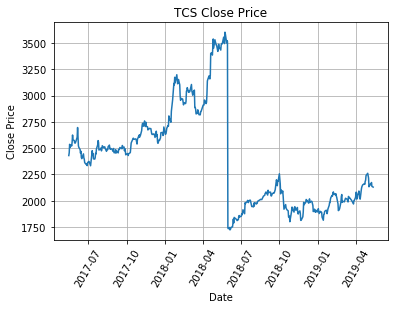

In [2]:
data.set_index('Date')  #Print this and check


register_matplotlib_converters
plt.plot(data['Date'], data["Close Price"])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation = 60)
plt.title('TCS Close Price')
plt.grid()
plt.show()

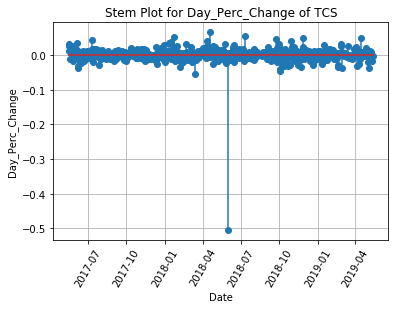

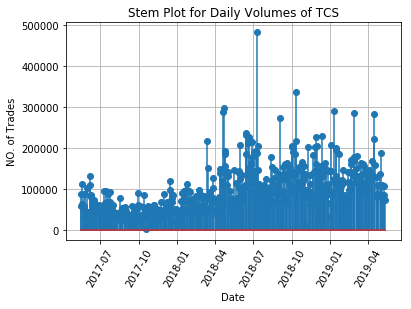

In [3]:
plt.stem(data['Date'],data['Day_Perc_Change'])
plt.xlabel('Date')
plt.ylabel('Day_Perc_Change')
plt.xticks(rotation = 60)
plt.title('Stem Plot for Day_Perc_Change of TCS')
plt.grid()
plt.show()

plt.stem(data['Date'],data['No. of Trades'])  #Volumes
plt.xlabel('Date')
plt.ylabel('NO. of Trades')
plt.xticks(rotation = 60)
plt.title('Stem Plot for Daily Volumes of TCS') 
plt.grid()
plt.show()

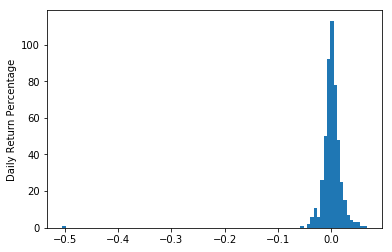

In [4]:
# HISTOGRAM

plt.hist(data['Day_Perc_Change'], bins =92)
plt.ylabel('Daily Return Percentage')
plt.show()

C:\Users\Suman\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


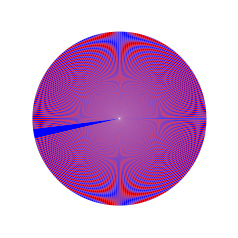

In [5]:
# PIE Chart

def conditions(s):
    if s['Day_Perc_Change'] > -0.5 and s['Day_Perc_Change'] < 0.5 :
        return (1)
    elif s['Day_Perc_Change']> 0.5 and s['Day_Perc_Change']<1:
        return (2)
    elif s['Day_Perc_Change'] >-0.5 and s['Day_Perc_Change']<-1:
        return (3)
    elif s['Day_Perc_Change'] in range(1,3):
        return (4)
    elif s['Day_Perc_Change'] in range(-1,-3):
        return (5)
    elif s['Day_Perc_Change'] in range(3,7):
        return (6)
    elif s['Day_Perc_Change'] in range(-3,-7):
        return (7)
    elif s['Day_Perc_Change'] > 7:
        return(8)
    else:
        return (9)
    
data['Trend'] =  data.apply(conditions, axis=1)
df = pd.DataFrame(data,columns=['Trend'])
df =df.reset_index(drop =True)
colors = ['Blue', 'red']
my_labels=['Slight Negative', 'Slight or No Change']
group1 = data.groupby('Trend')
plt.pie(data["Trend"], colors = colors)
plt.show()

In [ ]:
data